# F1 Grand Prix Results Predictor
## with Machine Learning
#### Mikayla Piercy, 18023721

#### Introduction to F1. 
Formula 1 (F1) is an auto-racing class which uses the fastest regulated racing cars in the world. The championship consists of 10 constructors, who have 2 drivers each competing at each Grand Prix. Drivers compete for both individual and team points, with the top 10 positions gaining points and top 3 on the podium. Drivers points contribute to their standings in the drivers championship, while a combination of both drivers of a teams points contribute to the constructor championship. The following point system is used:

| Pos. | Pts. |
| :---- | :---- |
| 1st | 25 |
| 2nd | 18 |
| 3rd | 15 |
| 4th | 12 |
| 5th | 10 |
| 6th | 8 |
| 7th | 6 |
| 8th | 4 |
| 9th | 2 |
| 10th | 1 |  

With 1 bonus point being awarded to both driver of the day and fastest lap.  
  
The typical Grand Prix weekend also involves the following events:  
**Friday:**  
- Practice 1 (P1)
- Practice 2 (P2)  
Allows drivers to become acquainted with the track.  

**Saturday:**
- Practice 3 (P3)
- Qualifying  
Qualifying is split into three segments of the drivers aiming to get the fastest lap they can, with the slowest 5 drivers getting eliminated in both Q1 and Q2. The standings after qualifying determines the starting position of each driver on the grid for the real race.  

**Sunday:**  
- The Race  
  
#### Purpose of this Project
The purpose of this project is to predict whether drivers will finish on the podium (1-3), in the points (4-10) or score no points in a Grand Prix. As one of the attributes used is a drivers qualifying time/grid positions, these would have to be avaiable prior to predictions being made.
  
#### What it does account for
The data used to train the classifier models looks into the following attributes:
- the circuit
- weather
- driver (inc. age and nationality)
- constructor
- grid position
- driver points, standings and wins
- constructor points, standings and wins
- qualifying time
  
#### What is doesn't account for
Sometimes all it takes is 1/100th of a second to determine someones position in a race, so here are some of the key attributes which these models do not consider:
- race strategy (pit stops, tyre compounds, fuel)
- data from previous seasons
- crashes (common and unpredictable)
  
  
#### Collating and Preprocessing the Data
A primary source for the data I used is [this dataset](https://www.kaggle.com/prajwalsood/f1-race-by-race-19832021) from Prasjwal Sood (2021). I took just the 2021 data (as of 15/09) and combined the .csv files from each round into one large .arff file with a few changes to the attributes. As the original dataset was not a suitable format/collation, all instances were manually entered so I had to be extra careful about data entry errors. Where possible I tried to use nominal attributes rather than numeric, particularly for the set numerical values such as positions/standings. I also added in a couple of more rounds with recent data from the last couple of weeks, so that predictions would hopefully be more accurate when it comes to testing upcoming races.

Initially, the idea was to predict whether or not a driver would get a podium finish or not, as shown below.

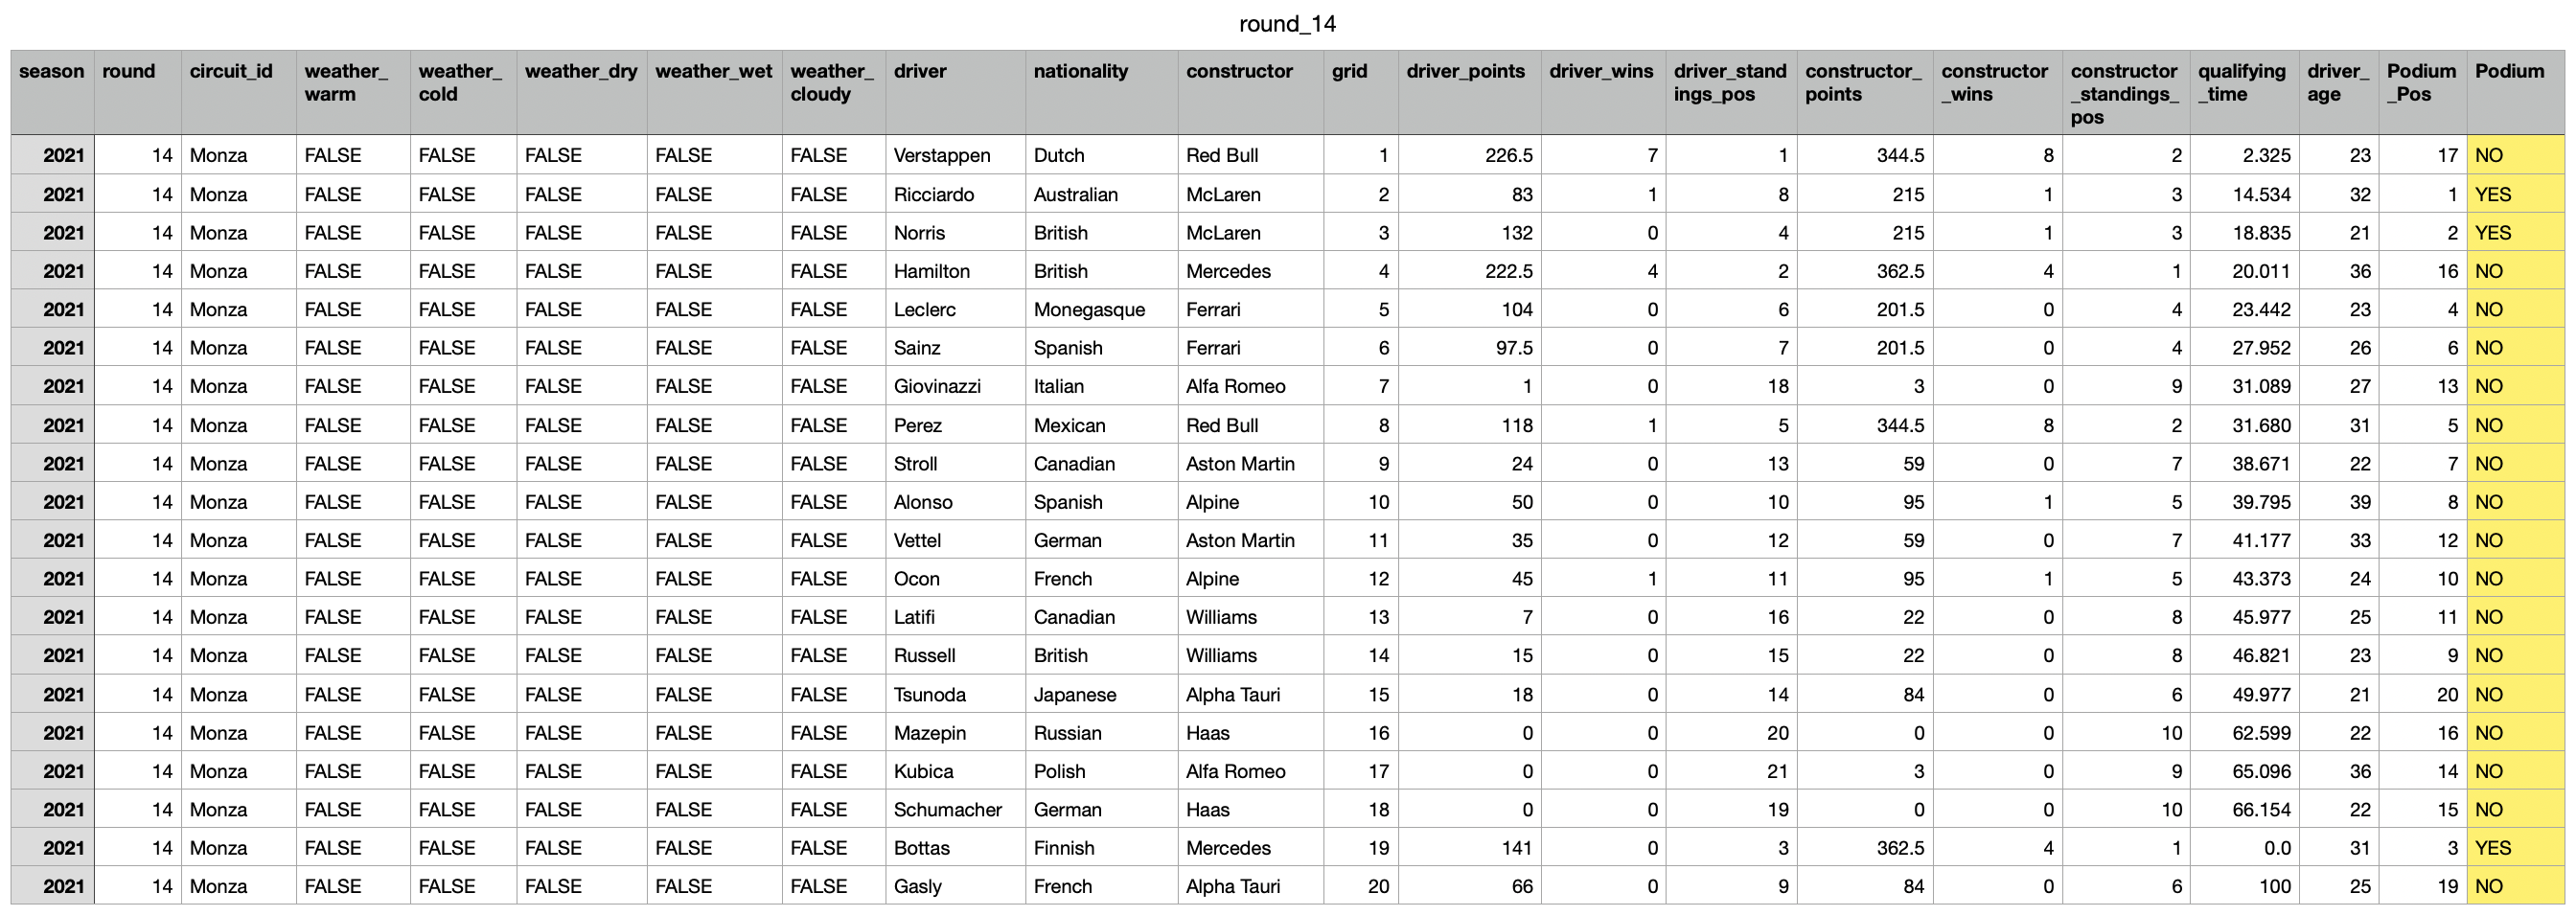

Due to the varying ranges of numerical data for fields such points and qualifying times, I made sure to normalise the data so the values were on a more consistent scale.
  
  
#### Training the Models  
**Naive Bayes:**  
The Naive Bayes classification algorithm works well with nominal values, such as the driver, constructor and grid positions. Although the Bayes Theorum assumes all nominal attributes are independent of eachother, which is not the case for this project, this algorithm can still be largely effective.  
  
**J48 Decision Tree:**  
The J48 decision tree uses decision nodes and their 'leaf' outcomes to classify an instance of data against the class variable.
  
**Logistic Regession:**  
Logistic regression is a binary classification algorithm which works really well with numerical values. I thought this was a suitable algorithm as a model since I was prediction YES/NO for whether a driver would get a podium position, and used numerous numerical values such as the driver/constructor points and their qualifying times, which arguably are some of the more telling attributes of a drivers capabilities that weekend.
  
**k-Nearest Neighbours:**  
k-Nearest Neighbours can be used for both classification and regression. It assumes that instances will appear in close proximity to other instances with similar values. This is done via the distance between points on a graph. Due to a higher k value typically providing more accurate classifications, I tested the KNN algorithm with a value of both 1 and 2 to contrast.
  
**Support Vector Machines:**  
SVM uses different decision boundaries to make classificications about an instance of data. Data which falls on either side of these boundaries can be classified as the different classes. The more input features, the more complex the decision boundaries become.   
    
I also a few other algorithms and recorded both the accuracies and MCC values for each outcome. Each algorithm was tested using; training data, 10-fold cross-validation as well as a 80%/20% split. As the MCC is a measure of the quality of the classification, with 1 being a great model and -1 being a poor model, I felt this would also be a good indicator of model effectiveness.
  
#### Model Results  
After training up the original models, the tested outputs had the following accuracies and MCC values.   
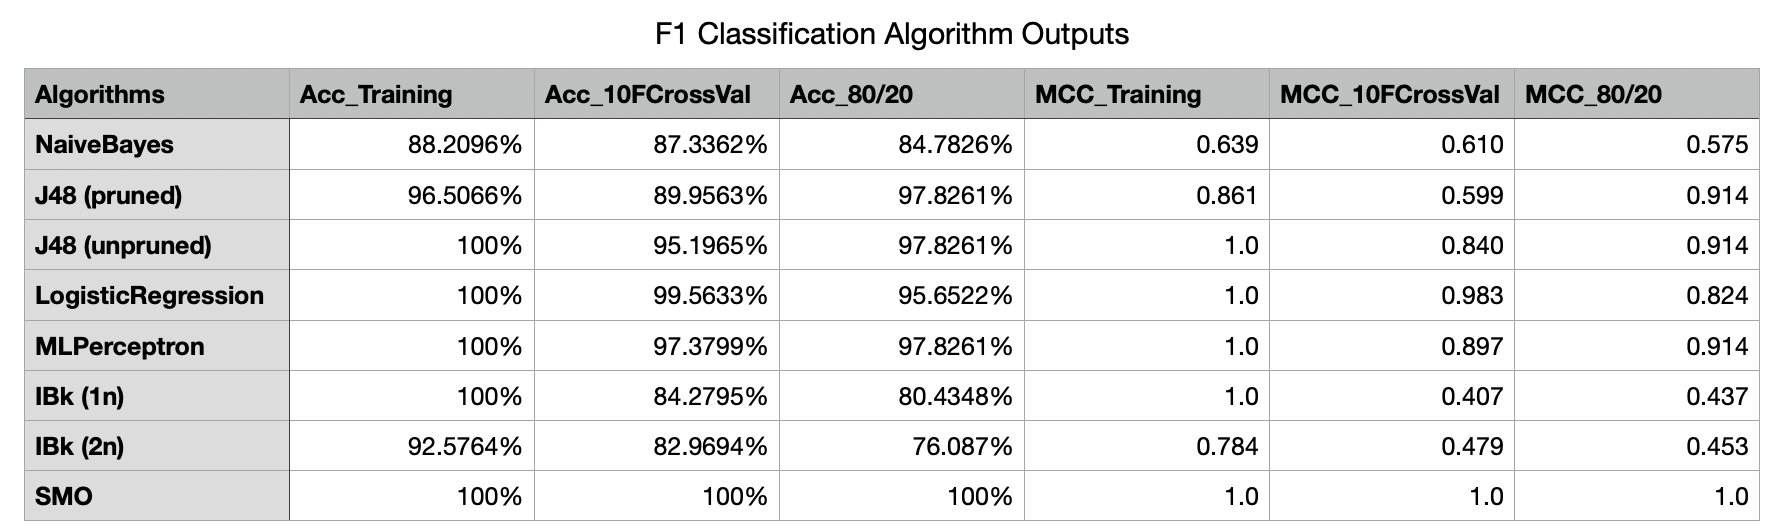
    
With this initial dataset, the accuracies for each algorithm ranged between 76% and 100%, with the lowest MCC value being ~0.41.  *discuss some more???*

I was a little suprised initially at all of the high scoring accuracies given the nature of F1, when I realised there was a lot of bias and direct correlation between providing the models with the drivers final position and whether or not they were on the podium. 
   
#### Reformatting the data (V2) 
I decided the models needed to be redone, as providing them with the final race position wasn't a true test of the accuracies, so reformatted the data and also changed the class variable from just a 'YES' or 'NO' to whether a driver would finish on the 'podium', in the 'points' or with 'no points'. This left me with the following data (round 14 only):  
    
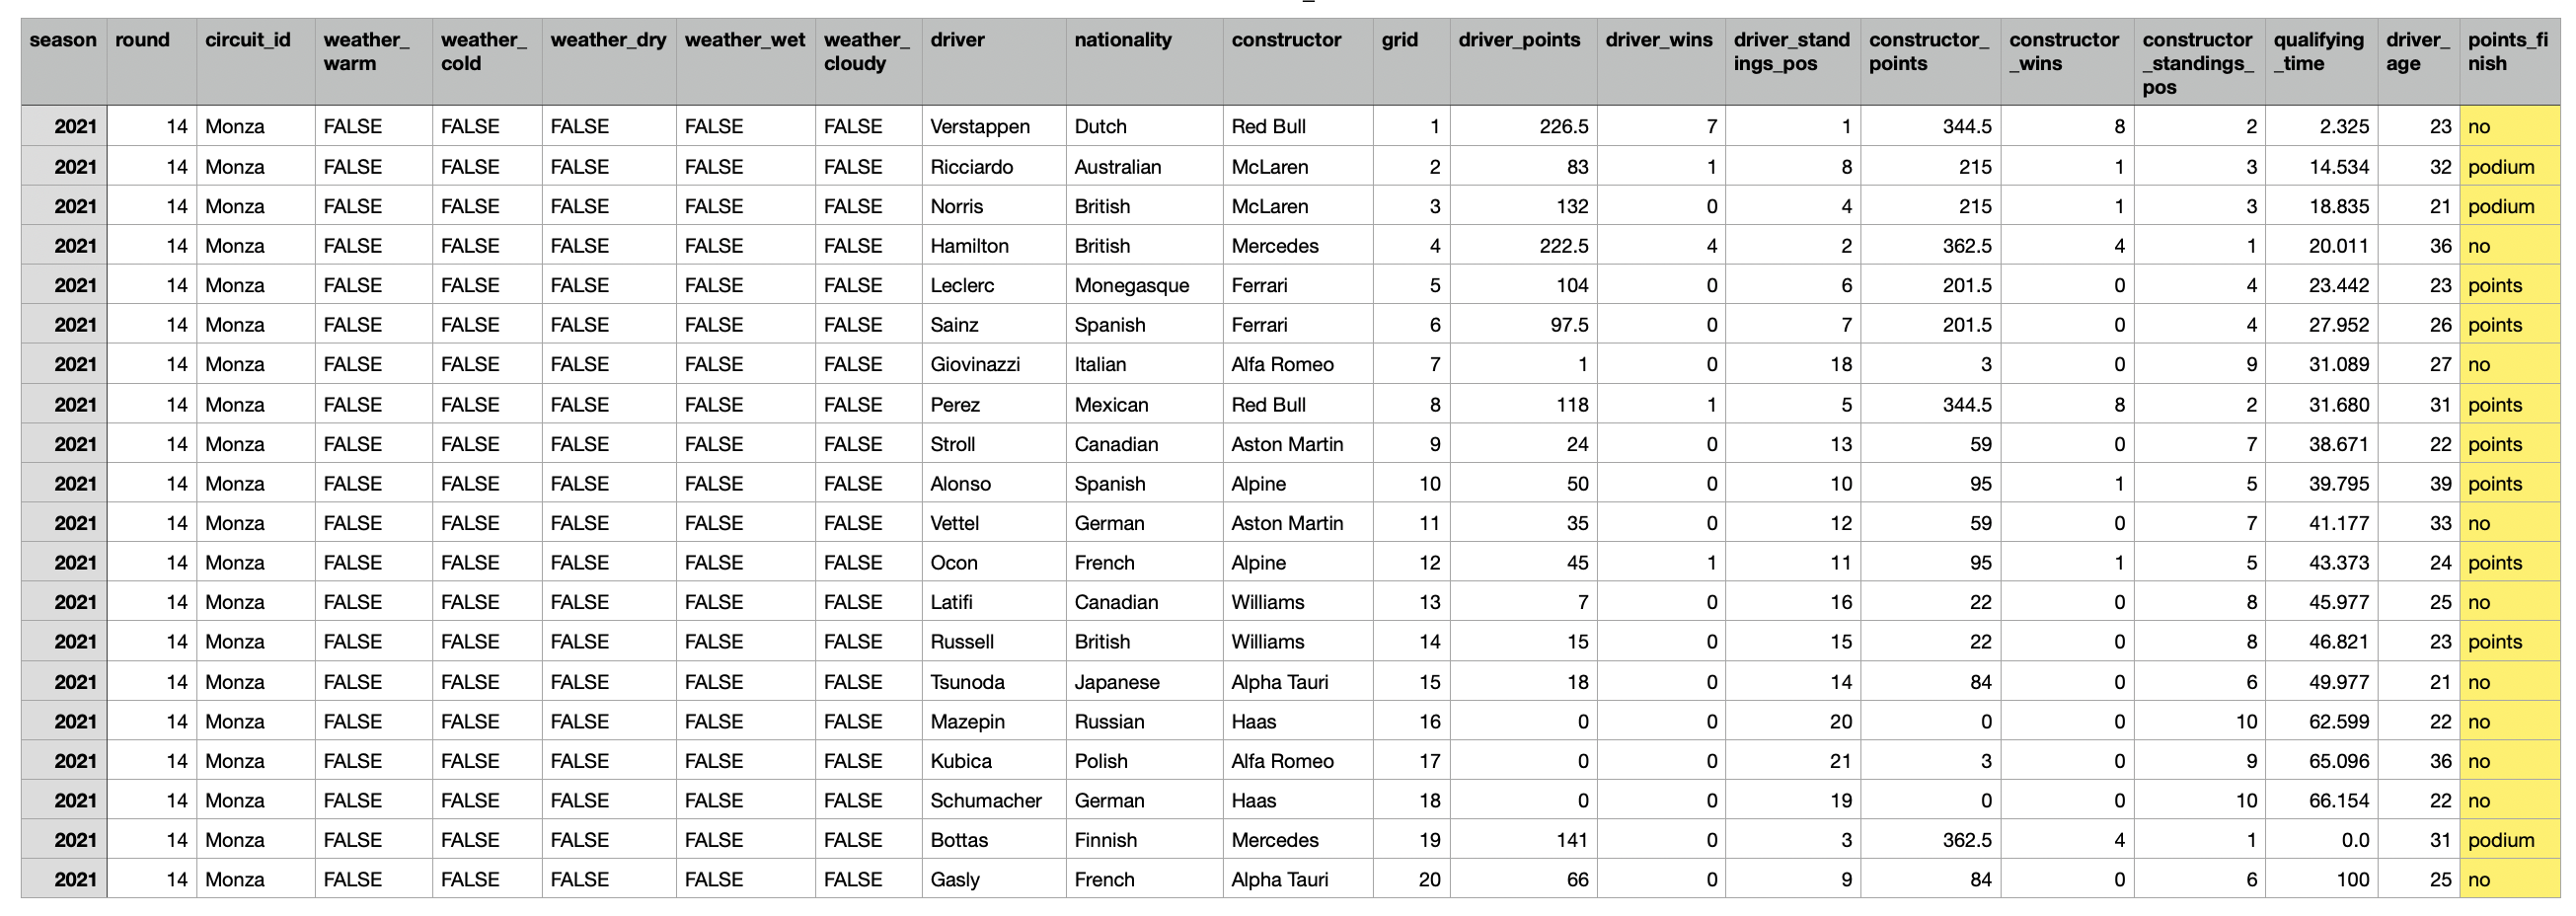

Here is an excerpt of the dataset .arff file

In [ ]:
@relation f1_2021_data_v2

@attribute round {'1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22'}
@attribute circuit_id {'bahrain','imola','portimao','catalunya','monaco','baku','ricard', 'red_bull_ring','silverstone','hungaroring','spa','zandvoort','monza'}
@attribute weather_warm {'TRUE','FALSE'}
@attribute weather_cold {'TRUE','FALSE'}
@attribute weather_dry {'TRUE','FALSE'}
@attribute weather_wet {'TRUE','FALSE'}
@attribute weather_cloudy {'TRUE','FALSE'}
@attribute driver {'hamilton', 'verstappen','ricciardo','bottas','perez','norris','leclerc','sainz','gasly','tsunoda','mazepin','mick_schumacher','vettel','giovinazzi','latifi','russell','ocon','raikkonen','stroll','alonso','kubica'}
@attribute nationality {'british','dutch','finnish','monegasque','french','australian','mexican','spanish','canadian','italian','japanese','german','russian','polish'}
@attribute constructor {'red_bull','mercedes','ferrari','mclaren','alpine','aston_martin','alfa_romeo','alphatauri','williams','haas'}
@attribute grid {'1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20'}
@attribute driver_points numeric
@attribute driver_wins {'0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22'}
@attribute driver_standings_pos {'0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21'}
@attribute constructor_points numeric
@attribute constructor_wins {'0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22'}
@attribute constructor_standings_pos {'0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20'}
@attribute qualifying_time numeric
@attribute driver_age numeric
@attribute points_finish {'podium','points','no_points'}

@data
1,bahrain,FALSE,FALSE,FALSE,FALSE,FALSE,verstappen,dutch,red_bull,1,0,0,0,0,0,0,0.0,23,podium
3,portimao,FALSE,FALSE,FALSE,FALSE,FALSE,norris,british,mclaren,7,27,0,3,41,0,3,0.799999999999997,21,points
8,red_bull_ring,FALSE,FALSE,FALSE,FALSE,FALSE,tsunoda,japanese,alphatauri,11,8,0,14,45,0,5,0.700000000000003,21,points
10,silverstone,TRUE,FALSE,TRUE,FALSE,FALSE,gasly,french,alphatauri,12,37,0,8,46,0,6,48.763,25,no_points
14,monza,FALSE,FALSE,FALSE,FALSE,FALSE,ricciardo,australian,mclaren,2,83,1,8,215,1,3,14.534,32,podium

  #### New Model Results  
After retraining the same algorithms as last time, I ended up with the following accuracies and MCC values.   
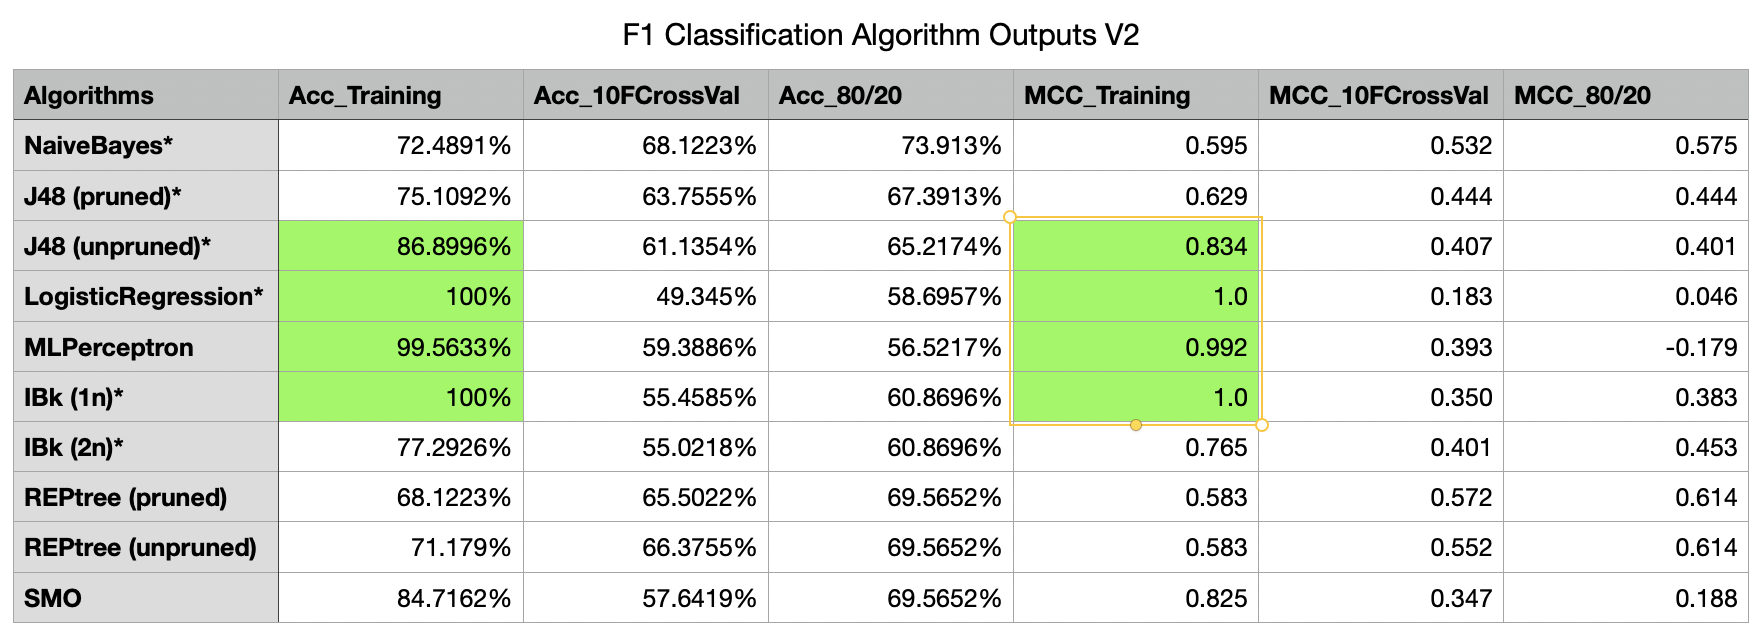

Overall, the accuracies dropped by ~20% for most of the algorithms. As I removed the final race position from the original dataset, I definitely expected a drop in accuracy of the newer models, since it directly correlates to my class variable. The newer models also are predicting a class variable with three possible options rather than podium? yes or no. Something which may also have an affect on the lower accuracies could be that drivers battling for the lower end of the points positions can generally vary greatly week to week, making it harder to predict. Whereas, whilst there is obviously variance in the drivers which get on the podium, it seems to be a little more consistent.  
  
The logistic regression and KNN (IBk, 1 neighbour) still scored a 100% accuracy with the new models, while the J48 decision tree (unpruned) and MultiLayerPerceptron still scored quite highly. Therefore I will be using these four and perhaps the SVM (SMO) model to predict the outcome of the next couple of Grands Prix.  
   
#### Predicting the Russian Grand Prix  
- talk about inserting data against trained models once final grid positions are available
- which models I used (3 most acc?)
- show outcome of prediction vs actual grand prix
- talk about similarities/differences. what did it get right/wrong? how accurate was it?  
    
  
#### Predicting the Turkish Grand Prix  
- talk about inserting data against trained models once final grid positions are available
- which models I used
- show outcome of prediction vs actual grand prix
- talk about similarities/differences. what did it get right/wrong? how accuarate was it?  
  
  
#### Discussion  
  - Were the results accurate or useful?  
  
#### Improvements and Next Steps  
- If i were to further improve this, I think a good next step would be to implement some sort of basic UI using Python to make data entry for predictions a lot smoother and available to be used by others.
- The models could also be made more accurate by including results from previous years, even though there is a lot more data available for some drivers than others. Including other attributes would be difficult considering what is publicly available prior to a race, although reasonable predictions on a teams race strategy can also be estimated.
- I also think it would be more appropriate to set the drivers age attribute to a range variable and have something like: '17-23', '24-27' etc.
- other improvements (anything after actually doing the predictions?)

### **References**
 
Witten, I. H., Frank, E., Hall, M. A., & Pal, C. J. (2016). The Weka Workbench (Fourth ed.). Waikato University. https://www.cs.waikato.ac.nz/ml/weka/Witten_et_al_2016_appendix.pdf  
<br>
ESPN. (2021). Formula One Standings. ESPN.Com. https://www.espn.com/f1/standings/_/sort/aut2/dir/desc  
<br>
FIA. (2021). F1 2021 Results. Formula 1® - The Official F1® Website. https://www.formula1.com/en/results.html/  
<br>
RacingNews365 Staff. (2021, September 12). Starting Grid: F1 2021 Italian Grand Prix. RacingNews365. https://racingnews365.com/starting-grid-2021-italian-grand-prix  
<br>
Brownlee, J. (2020, December 9). How to Save Your Machine Learning Model and Make Predictions in Weka. Machine Learning Mastery. https://machinelearningmastery.com/save-machine-learning-model-make-predictions-weka/  
<br>
Brownlee, J. (2019, August 22). How To Use Classification Machine Learning Algorithms in Weka. Machine Learning Mastery. https://machinelearningmastery.com/use-classification-machine-learning-algorithms-weka/  
<br>
Sood, P. (2021, August 28). F1 race by race (1983–2021). Kaggle. https://www.kaggle.com/prajwalsood/f1-race-by-race-19832021